In [1]:
library(clusterProfiler)
library(enrichplot)
library(fgsea)
library(hash)
library("stringr")
library(Seurat)

# we use ggplot2 to add x axis labels (ex: ridgeplot)
library(ggplot2)
organism = "org.Dm.eg.db"
library(organism, character.only = TRUE)

df <- read.csv("t100_genes_per_metaprogram_6_MP.csv", header=TRUE)




Registered S3 method overwritten by 'ggtree':
  method      from 
  identify.gg ggfun

clusterProfiler v4.2.2  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use clusterProfiler in published research, please cite:
T Wu, E Hu, S Xu, M Chen, P Guo, Z Dai, T Feng, L Zhou, W Tang, L Zhan, X Fu, S Liu, X Bo, and G Yu. clusterProfiler 4.0: A universal enrichment tool for interpreting omics data. The Innovation. 2021, 2(3):100141


Attaching package: ‘clusterProfiler’


The following object is masked from ‘package:stats’:

    filter


hash-2.2.6.2 provided by Decision Patterns


Attaching SeuratObject

Loading required package: AnnotationDbi

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    

In [2]:
df

MP_0       MP_1       MP_2       MP_3       MP_4        MP_5      
1   MALAT1     MALAT1     MALAT1     MALAT1     MALAT1      FP236383.3
2   RBMS3      NEAT1      NEAT1      PTPRC      FN1         FP671120.4
3   AUTS2      LRMDA      FP236383.3 MBNL1      COL3A1      COL1A2    
4   FP236383.3 PLXDC2     ZBTB20     ARHGAP15   COL1A2      COL1A1    
5   MBNL1      DPYD       QKI        PRKCH      FP236383.3  COL6A2    
6   PTPRG      DOCK4      XIST       RABGAP1L   COL6A3      VIM       
7   LRMDA      CHST11     FNDC3B     CBLB       COL1A1      ACTB      
8   NEAT1      ZEB2       PPP2R2B    SKAP1      EXT1        EEF1A1    
9   MIR99AHG   AKAP13     PDE4B      PARP8      GPC6        COL6A1    
10  TENM3      ELMO1      PCDH9      UTRN       NEAT1       COL5A1    
11  COL1A2     SAT1       DLG2       CELF2      CALD1       FN1       
12  SDK1       TCF12      ELMO1      ZBTB20     VMP1        MALAT1    
13  TTC28      MBNL1      MED13L     ANKRD44    FBXL7       B2M       
14  KAZN       LPP        SIK3       TOX        TRIO        EEF2      
15  GPC6       ITPR2      DPYD       CHST11     COL5A2      HLA-B     
16  FP671120.4 FOXN3      EXOC4      ATXN1      CAMK2D      GSN       
17  DST        FNDC3B     MBNL1      LRBA       VPS13B      CFD       
18  FNDC3B     UTRN       FP671120.4 FYN        DUXAP8      FSTL1     
19  FTX        MAML2      TCF12      INPP4B     PRKG1       HLA-A     
20  RAD51B     SLC8A1     IGLV2-8    PIP4K2A    FNDC3B      TIMP2     
21  ARID1B     FP236383.3 MACF1      SMCHD1     ZEB2        HNRNPA2B1 
22  ZBTB20     MACF1      ATXN1      THEMIS     CDK14       MYH9      
23  RUNX1T1    PICALM     CADM2      RNF213     DST         COL7A1    
24  STK3       QKI        MBP        FYB1       STK3        APP       
25  FOXP1      SFMBT2     IGHG2      ARAP2      EPS8        COL3A1    
26  STAG1      ETV6       TBC1D5     CDC42SE2   PTK2        H3F3B     
27  JMJD1C     CELF2      IGHG1      NEAT1      ZFAND3      FTH1      
28  NRXN3      FMNL2      FRMD5      DOCK10     AKAP13      SRRM2     
29  TCF12      ATXN1      IL1RAPL1   FOXN3      PDE3A       HSP90AA1  
30  EXOC4      HIF1A      DST        LYST       ASAP1       COL6A3    
⋮   ⋮          ⋮          ⋮          ⋮          ⋮           ⋮         
71  PCDH9      ARHGAP18   ANK3       HLA-A      FAM110B     IGF2      
72  EXT1       AOAH       ST18       RNF19A     COL6A1      TUBA1B    
73  VCAN       LDLRAD4    SLC24A2    HLA-B      ABCC9       ADAMTS2   
74  DOCK4      FMN1       ETV6       FAM172A    KANSL1      ABI3BP    
75  MEIS1      SSH2       AC008014.1 TNRC6B     SDC2        GSE1      
76  RERE       SIPA1L1    ARHGAP24   SLFN12L    JMJD1C      IGFBP7    
77  NCOA2      TCF4       FOXN3      IQGAP2     ETV6        NFIC      
78  ADAMTS9    KANSL1     ITPR2      ITPR2      PRKDC       SDK1      
79  MACF1      ARID1B     DLG1       FNBP1      SPATA5      LRP1      
80  PRDM1      KCNMA1     DNM3       TCF12      RAPGEF2     SPTBN1    
81  GPHN       FAM49B     FTX        MED13L     PALM2-AKAP2 LAPTM4A   
82  PDE4D      UBE2E2     PICALM     EXOC4      HNRNPA2B1   UAP1      
83  PLCB1      DOCK10     XBP1       FUT8       SPIDR       PRKDC     
84  MAP2       MARCH1     UBE2E2     PDE3B      MEF2A       RRBP1     
85  ZFHX3      MRC1       CEP128     FP236383.3 NFIA        ADAR      
86  PVT1       WDFY3      MSI2       CD44       FNIP2       INHBA     
87  SORCS2     TBXAS1     RUNX1      HNRNPA2B1  PARD3B      ITGB1     
88  SEMA5A     TLR2       LRP1B      KMT2C      BIRC6       PSAP      
89  HIPK2      ARL15      FCHSD2     CNOT6L     COL5A1      H19       
90  ZEB2       FHIT       LPP        ARHGAP26   ARID1B      NCOR2     
91  SSBP3      RBM47      NTM        TXNIP      DPYD        C1S       
92  DCC        ZSWIM6     UTRN       FTX        SEPTIN7     NUPR1     
93  PIEZO2     SBF2       ANK2       BCL2       TBC1D5      FAM20C    
94  EBF1       SLCO2B1    FOS        STAG1      SLC8A1      DCN       
95  GRM7       RUNX1      CT

In [3]:
first_best_samples_H_matrix = c("Sarcoma167GEX/Sarcoma167GEX_KINOMO_nmf_rank_4_H.csv",
                     "Sarcoma322GEX/Sarcoma322GEX_KINOMO_nmf_rank_3_H.csv",
                     "Sarcoma559GEX/Sarcoma559GEX_KINOMO_nmf_rank_3_H.csv",
                     "Sarcoma708GEX/Sarcoma708GEX_KINOMO_nmf_rank_4_H.csv",
                     "SarcomaS408GEX/SarcomaS408GEX_KINOMO_nmf_rank_3_H.csv",
                     "SarcomaS410GEX/SarcomaS410GEX_KINOMO_nmf_rank_3_H.csv",
                     "SarcomaS914GEX/SarcomaS914GEX_KINOMO_nmf_rank_3_H.csv",
                     "SarcomaS956GEX/SarcomaS956GEX_KINOMO_nmf_rank_5_H.csv")
H.mat.list <- lapply(first_best_samples_H_matrix, function (x) read.csv(x))


In [4]:
#partial.list <- lapply(pat_list, function (x) readRDS(paste0(pat_basedir, x, "/", x, "_cnv_non_malignant.rds")))
pat_list <- c('Sarcoma167GEX', 'Sarcoma322GEX', 'Sarcoma559GEX', 'Sarcoma708GEX', 
              'SarcomaS408GEX', 'SarcomaS410GEX', 'SarcomaS914GEX', 'SarcomaS956GEX')

In [5]:
H.mat.list <- lapply(first_best_samples_H_matrix, function (x) read.csv(x))


In [6]:
which.max(H.mat.list[[1]][['TCAATCTTCCTTTACA.1']])

[1] 2

In [7]:
index <- 1

## hash-2.2.6 provided by Decision Patterns

rank.cell.mappings <- hash() 


for (x in pat_list){
    print(first_best_samples_H_matrix[[index]])
    for (y in rownames(H.mat.list[[index]])){
        rank.cell.mappings[[paste0(x, ".", y)]] <- list()
        print(y)
    }
    for (y in colnames(H.mat.list[[index]])){
        rank <- which.max(H.mat.list[[index]][[y]])
        rank.cell.mappings[[paste0(x, ".", rank)]] <- append(rank.cell.mappings[[paste0(x, ".", rank)]], y)
    }
    index <- index + 1
}

[1] "Sarcoma167GEX/Sarcoma167GEX_KINOMO_nmf_rank_4_H.csv"
[1] "1"
[1] "2"
[1] "3"
[1] "4"
[1] "Sarcoma322GEX/Sarcoma322GEX_KINOMO_nmf_rank_3_H.csv"
[1] "1"
[1] "2"
[1] "3"
[1] "Sarcoma559GEX/Sarcoma559GEX_KINOMO_nmf_rank_3_H.csv"
[1] "1"
[1] "2"
[1] "3"
[1] "Sarcoma708GEX/Sarcoma708GEX_KINOMO_nmf_rank_4_H.csv"
[1] "1"
[1] "2"
[1] "3"
[1] "4"
[1] "SarcomaS408GEX/SarcomaS408GEX_KINOMO_nmf_rank_3_H.csv"
[1] "1"
[1] "2"
[1] "3"
[1] "SarcomaS410GEX/SarcomaS410GEX_KINOMO_nmf_rank_3_H.csv"
[1] "1"
[1] "2"
[1] "3"
[1] "SarcomaS914GEX/SarcomaS914GEX_KINOMO_nmf_rank_3_H.csv"
[1] "1"
[1] "2"
[1] "3"
[1] "SarcomaS956GEX/SarcomaS956GEX_KINOMO_nmf_rank_5_H.csv"
[1] "1"
[1] "2"
[1] "3"
[1] "4"
[1] "5"


In [8]:
as.vector(rank.cell.mappings[['Sarcoma167GEX.2']])



[[1]]
[1] "CTACCCACAAACTGTC.1"

[[2]]
[1] "TGGCCAGTCATGCTCC.1"

[[3]]
[1] "CCTAAAGGTTCACCTC.1"

[[4]]
[1] "CGGAGTCTCCAAACTG.1"

[[5]]
[1] "AGCGTATAGGCCGAAT.1"

[[6]]
[1] "CAAGGCCAGGGAAACA.1"

[[7]]
[1] "TGCGGGTAGATCTGCT.1"

[[8]]
[1] "ACCGTAACAAACAACA.1"

[[9]]
[1] "GTGCTTCAGAAGGTGA.1"

[[10]]
[1] "CACCACTAGCCCAACC.1"

[[11]]
[1] "TACGGGCAGGCTAGCA.1"

[[12]]
[1] "ATCTACTGTGACTACT.1"

[[13]]
[1] "GACACGCCATGCAATC.1"

[[14]]
[1] "ACTGAGTGTAAATGTG.1"

[[15]]
[1] "AGAGCTTGTGTAAGTA.1"

[[16]]
[1] "AACCATGGTTCCGTCT.1"

[[17]]
[1] "GTTCTCGAGTTGTCGT.1"

[[18]]
[1] "ACGCAGCGTACCATCA.1"

[[19]]
[1] "TGCCAAATCCAAACAC.1"

[[20]]
[1] "TAAGTGCTCGAATGGG.1"

[[21]]
[1] "TTGAACGTCAGCTGGC.1"

[[22]]
[1] "ATCCGAACATCAGTAC.1"

[[23]]
[1] "TCTGAGATCTGGTATG.1"

[[24]]
[1] "GGACGTCAGACTACAA.1"

[[25]]
[1] "TTTATGCCAGTGGGAT.1"

[[26]]
[1] "AGTAGTCAGCTGTCTA.1"

[[27]]
[1] "ACACTGAGTGGTACAG.1"

[[28]]
[1] "TCGGTAATCAACACCA.1"

[[29]]
[1] "CTGCGGAAGTTAGGTA.1"

[[30]]
[1] "CACACTCCACCCATTC.1"

[[31]]
[1] "GCTCTGTGTTGAGTTC.1"

[[32]]
[1] "CCGTGGATCTGTCAAG.1"

[[33]]
[1] "CAGCCGAAGTCTCAAC.1"

[[34]]
[1] "TGCGCAGAGCAAATCA.1"

[[35]]
[1] "CAGATCATCCACTGGG.1"

[[36]]
[1] "ACCGTAAAGAGGACGG.1"

[[37]]
[1] "CGATTGAAGCAGACTG.1"

[[38]]
[1] "CCTAGCTAGACTCGGA.1"

[[39]]
[1] "CATGCCTCAAGCTGTT.1"

[[40]]
[1] "TACGGGCCACACATGT.1"

[[41]]
[1] "CGTTGGGTCCAAAGTC.1"

[[42]]
[1] "CTCGAAAAGCCGGTAA.1"

[[43]]
[1] "AGCCTAAAGTTCCACA.1"

[[44]]
[1] "GGCTGGTCAGATGGGT.1"

[[45]]
[1] "TGAAAGACAGGTCCAC.1"

[[46]]
[1] "TGAGCATCACTTAAGC.1"

[[47]]
[1] "CGACCTTGTCTTGTCC.1"

[[48]]
[1] "AGGCCACCAGCTGTTA.1"

[[49]]
[1] "CGGAGTCAGGATGTAT.1"

[[50]]
[1] "ACGCAGCGTAAAGGAG.1"

[[51]]
[1] "GGACATTTCAGCTCGG.1"

[[52]]
[1] "TGACAACAGGGAACGG.1"

[[53]]
[1] "GCGCGATGTTCCCTTG.1"

[[54]]
[1] "CGAACATAGTTTAGGA.1"

[[55]]
[1] "GAATAAGCAATTCCTT.1"

[[56]]
[1] "TGACTAGAGCTATGCT.1"

[[57]]
[1] "GTAGTCATCTAACCGA.1"

[[58]]
[1] "ACACCGGTCCCAGGTG.1"

[[59]]
[1] "CAGCAGCCAGCTATTG.1"

[[60]]
[1] "ACATGGTCACATGACT.1"

[[61]]
[1] "ACAGCCGCAAACTGTC.1"

[[62]]
[1] "ATCCACCGTTAAGAAC.1"

[[63]]
[1] "TGGTTAGGTACCGAGA.1"

[[64]]
[1] "TTGCGTCTCACCACCT.1"

[[65]]
[1] "CTCGGGAGTCAAAGAT.1"

[[66]]
[1] "CGTCACTAGAAGGGTA.1"

[[67]]
[1] "CGATCGGCATCGGAAG.1"

[[68]]
[1] "ATTTCTGTCTTAGAGC.1"

[[69]]
[1] "GTCACGGGTAAAGGAG.1"

[[70]]
[1] "GCGCAACAGACCGGAT.1"

[[71]]
[1] "CGTCAGGTCCAAGTAC.1"

[[72]]
[1] "ACAGCTAAGTTAGGTA.1"

[[73]]
[1] "TAAGCGTAGTTGTAGA.1"

[[74]]
[1] "ATTTCTGGTGCAGGTA.1"

[[75]]
[1] "CGAGCCAAGTAGCCGA.1"

[[76]]
[1] "CTTAACTCACCTCGTT.1"

[[77]]
[1] "CTGAAACGTCTCCATC.1"

[[78]]
[1] "TGAGCATTCGGCTACG.1"

[[79]]
[1] "TCAGATGCATAACCTG.1"

[[80]]
[1] "TACAGTGAGTGCGATG.1"

[[81]]
[1] "ACAGCTATCACGAAGG.1"

[[82]]
[1] "GGACAGAAGCTCCTTC.1"

[[83]]
[1] "AAAGATGAGTCGTACT.1"

[[84]]
[1] "GTGTGCGAGCAAATCA.1"

[[85]]
[1] "CTACATTCAATCGAAA.1"

[[86]]
[1] "TTCCCAGTCCTGTACC.1"

[[87]]
[1] "ATGAGGGAGATAGCAT.1"

[[88]]
[1] "CGATTGAAGCCGGTAA.1"

[[89]]
[1] "CTGTGCTCAGTAAGCG.1"

[[90]]
[1] "GACCAATTCAACTCTT.1"

[[91]]
[1] "TGCGTGGCAATAACGA.1"

[[92]]
[1] "AGCTCCTAGAACAATC.1"

[[93]]
[1] "TGTGGTAGTAAACACA.1"

[[94]]
[1] "CACTCCAGTCTTTCAT.1"

[[95]]
[1] "ACTTACTGTGAAATCA.1"

[[96]]
[1] "ACTGATGGTAAGTAGT.1"

[[97]]
[1] "TACTCATGTTGGACCC.1"

[[98]]
[1] "GTGCAGCTCAACACGT.1"

[[99]]
[1] "GTACGTAGTCGCGAAA.1"

[[100]]
[1] "TACTCATAGAGTGAGA.1"

[[101]]
[1] "TACACGATCTACTATC.1"

[[102]]
[1] "TCGGGACAGATACACA.1"

[[103]]
[1] "ACGGGTCTCTAACTGG.1"

[[104]]
[1] "AAATGCCTCGGACAAG.1"

[[105]]
[1] "GTGCAGCAGTTTGCGT.1"

[[106]]
[1] "TCAGATGCAGTAGAGC.1"

[[107]]
[1] "GGATGTTAGGAGTCTG.1"

[[108]]
[1] "TGGTTCCAGTAGCGGT.1"

[[109]]
[1] "TGAAAGATCCAAGTAC.1"

[[110]]
[1] "GCAAACTAGAACAACT.1"

[[111]]
[1] "TCTGGAAGTGAGTATA.1"

[[112]]
[1] "TAGTGGTTCCCAGGTG.1"

[[113]]
[1] "CGGAGTCTCTAGCACA.1"

[[114]]
[1] "CTCTAATGTCCTGCTT.1"

[[115]]
[1] "GCTGCAGTCTAACTCT.1"

[[116]]
[1] "ACGGAGAAGTATCTCG.1"

[[117]]
[1] "AGTCTTTCAAGCCGTC.1"

[[118]]
[1] "ATGCGATCATGGGACA.1"

[[119]]
[1] "CACCACTTCTGTGCAA.1"

[[120]]
[1] "TTTGCGCTCGCAAGCC.1"

[[121]]
[1] "TCTTTCCTCAGAGCT

In [9]:
pat_list <- c('Sarcoma167GEX', 'Sarcoma322GEX', 'Sarcoma559GEX', 'Sarcoma708GEX', 'SarcomaS408GEX', 'SarcomaS410GEX', 'SarcomaS914GEX', 'SarcomaS956GEX')
minFeature <- 300
minCount <- 600


object.list <- lapply(pat_list, function (x) readRDS(paste0("~/CompiledData/data/", x, "/data_", 
                                        x, "_genes_", minFeature, '_UMI_', minCount, '_annotated_for_infercnv.rds')))
                      

                      
                      

In [10]:
        for (z in colnames(df)){
            print(unlist(df[z],  use.names=FALSE))
        }

  [1] "MALAT1"     "RBMS3"      "AUTS2"      "FP236383.3" "MBNL1"     
  [6] "PTPRG"      "LRMDA"      "NEAT1"      "MIR99AHG"   "TENM3"     
 [11] "COL1A2"     "SDK1"       "TTC28"      "KAZN"       "GPC6"      
 [16] "FP671120.4" "DST"        "FNDC3B"     "FTX"        "RAD51B"    
 [21] "ARID1B"     "ZBTB20"     "RUNX1T1"    "STK3"       "FOXP1"     
 [26] "STAG1"      "JMJD1C"     "NRXN3"      "TCF12"      "EXOC4"     
 [31] "LRFN5"      "CBLB"       "IMMP2L"     "AFF3"       "LPP"       
 [36] "FOXN3"      "VPS13B"     "FHIT"       "ADGRL3"     "LINC02476" 
 [41] "GSE1"       "PDE10A"     "HMGA2"      "LSAMP"      "STXBP5"    
 [46] "SPIDR"      "DPYD"       "AC011246.1" "UTRN"       "CDH11"     
 [51] "EFNA5"      "FARP1"      "TBC1D5"     "REV3L"      "NTRK2"     
 [56] "AKAP13"     "SGCD"       "ARHGAP26"   "KMT2C"      "RUNX1"     
 [61] "PTK2"       "ROR2"       "EGFR"       "MAML2"      "RORA"      
 [66] "FMNL2"      "APP"        "SFRP1"      "HNRNPA2B1"  "PID1"      
 [71] 

In [11]:
rank.cell.seurats <- hash() 

In [13]:

index <- 1           
for (x in pat_list){
    print(first_best_samples_H_matrix[[index]])
    for (y in rownames(H.mat.list[[index]])){
        temp <- RenameCells(object.list[[index]],
                            new.names =gsub(x = Cells(object.list[[index]]), pattern = "-", replacement = "."))
        for (z in colnames(df)){
            temp <- AddModuleScore(
                  object = temp,
                  features = list(as.vector(unlist(df[z],  use.names=FALSE))), 
                  name = paste0(z, "_metaprogram_genes"),
                  assay = "RNA"
                )
        }
        
        rank.cell.seurats[[paste0(x, ".", y)]] <- 
            subset(temp, cells=unlist(rank.cell.mappings[[paste0(x, ".", y)]], use.names=FALSE))
    }
    index <- index + 1
}

[1] "Sarcoma167GEX/Sarcoma167GEX_KINOMO_nmf_rank_4_H.csv"
[1] "Sarcoma322GEX/Sarcoma322GEX_KINOMO_nmf_rank_3_H.csv"


Warning message:
“The following features are not present in the object: IGLV2-8, IGHV5-51, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: AC083967.1, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: IGLV2-8, IGHV5-51, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: AC083967.1, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: IGLV2-8, IGHV5-51, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: AC083967.1, not searching for symbol synonyms”


[1] "Sarcoma559GEX/Sarcoma559GEX_KINOMO_nmf_rank_3_H.csv"
[1] "Sarcoma708GEX/Sarcoma708GEX_KINOMO_nmf_rank_4_H.csv"


Warning message:
“The following features are not present in the object: IGLV2-8, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: IGLV2-8, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: IGLV2-8, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: IGLV2-8, not searching for symbol synonyms”


[1] "SarcomaS408GEX/SarcomaS408GEX_KINOMO_nmf_rank_3_H.csv"


Warning message:
“The following features are not present in the object: IGLV2-8, IGLC3, IGHV5-51, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: IGLV2-8, IGLC3, IGHV5-51, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: IGLV2-8, IGLC3, IGHV5-51, not searching for symbol synonyms”


[1] "SarcomaS410GEX/SarcomaS410GEX_KINOMO_nmf_rank_3_H.csv"


Warning message:
“The following features are not present in the object: XIST, IGLV2-8, IGHG2, IGLC2, CNTNAP4, IGLC3, IFNG-AS1, IGHV5-51, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: XIST, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: XIST, IGLV2-8, IGHG2, IGLC2, CNTNAP4, IGLC3, IFNG-AS1, IGHV5-51, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: XIST, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: XIST, IGLV2-8, IGHG2, IGLC2, CNTNAP4, IGLC3, IFNG-AS1, IGHV5-51, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: XIST, not searching for symbol synonyms”


[1] "SarcomaS914GEX/SarcomaS914GEX_KINOMO_nmf_rank_3_H.csv"


Warning message:
“The following features are not present in the object: XIST, IGHV5-51, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: AC083967.1, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: XIST, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: XIST, IGHV5-51, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: AC083967.1, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: XIST, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: XIST, IGHV5-51, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: AC083967.1, not searching for symbol synonyms”
Warning message:
“The following features are not

[1] "SarcomaS956GEX/SarcomaS956GEX_KINOMO_nmf_rank_5_H.csv"


Warning message:
“The following features are not present in the object: IGLV2-8, IGLC2, IGLC3, IGHV5-51, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: IGLV2-8, IGLC2, IGLC3, IGHV5-51, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: IGLV2-8, IGLC2, IGLC3, IGHV5-51, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: IGLV2-8, IGLC2, IGLC3, IGHV5-51, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: IGLV2-8, IGLC2, IGLC3, IGHV5-51, not searching for symbol synonyms”


In [14]:
#temp <- AddModuleScore(
#                  object = object.list[[6]],
#                  features = list(as.vector(unlist(df[z],  use.names=FALSE))), 
#                  name = paste0(z, "_metaprogram_genes"),
#                  assay = "RNA"
#                )

In [15]:
colnames(temp@meta.data)

[1] "orig.ident"               "nCount_RNA"              
 [3] "nFeature_RNA"             "percent.mt"              
 [5] "percent.rps"              "percent.rpl"             
 [7] "percent.rp"               "patient"                 
 [9] "celltype_initial_singleR" "predicted_doublets"      
[11] "doublet_scores"           "RNA_snn_res.0.8"         
[13] "seurat_clusters"          "old.ident"               
[15] "celltype_"                "MP_0_metaprogram_genes1" 
[17] "MP_1_metaprogram_genes1"  "MP_2_metaprogram_genes1" 
[19] "MP_3_metaprogram_genes1"  "MP_4_metaprogram_genes1" 
[21] "MP_5_metaprogram_genes1"  "MP_6_metaprogram_genes1"

In [16]:
DefaultAssay(temp)

[1] "RNA"

In [17]:
Reduce(intersect,list(rownames(GetAssayData(temp)),unlist(df2[z],  use.names=FALSE)))


ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'x' in selecting a method for function 'Reduce': object 'df2' not found


In [ ]:
#saveRDS(rank.cell.seurats, "module_scored_metaprogram_objs.rds")

In [18]:
rank.cell.seurats[['Sarcoma708GEX.4']]

An object of class Seurat 
31252 features across 550 samples within 1 assay 
Active assay: RNA (31252 features, 2000 variable features)
 2 dimensional reductions calculated: pca, umap

In [19]:

rank.cell.seurats

<hash> containing 28 key-value pair(s).
  Sarcoma167GEX.1 : <S4 class ‘Seurat’ [package “SeuratObject”] with 13 slots>
  Sarcoma167GEX.2 : <S4 class ‘Seurat’ [package “SeuratObject”] with 13 slots>
  Sarcoma167GEX.3 : <S4 class ‘Seurat’ [package “SeuratObject”] with 13 slots>
  Sarcoma167GEX.4 : <S4 class ‘Seurat’ [package “SeuratObject”] with 13 slots>
  Sarcoma322GEX.1 : <S4 class ‘Seurat’ [package “SeuratObject”] with 13 slots>
  Sarcoma322GEX.2 : <S4 class ‘Seurat’ [package “SeuratObject”] with 13 slots>
  Sarcoma322GEX.3 : <S4 class ‘Seurat’ [package “SeuratObject”] with 13 slots>
  Sarcoma559GEX.1 : <S4 class ‘Seurat’ [package “SeuratObject”] with 13 slots>
  Sarcoma559GEX.2 : <S4 class ‘Seurat’ [package “SeuratObject”] with 13 slots>
  Sarcoma559GEX.3 : <S4 class ‘Seurat’ [package “SeuratObject”] with 13 slots>
  Sarcoma708GEX.1 : <S4 class ‘Seurat’ [package “SeuratObject”] with 13 slots>
  Sarcoma708GEX.2 : <S4 class ‘Seurat’ [package “SeuratObject”] with 13 slots>
  Sarcoma708

In [20]:
MP1 = c('Sarcoma322GEX.3', 'SarcomaS410GEX.3', 'SarcomaS914GEX.2', 'SarcomaS956GEX.1','SarcomaS956GEX.2', 'SarcomaS956GEX.4')

#Index(['V2_167', 'V2_708', 'V1_S408', 'V1_S410', 'V3_S914', 'V5_S956'], dtype='object')

MP2 = c('Sarcoma167GEX.2','Sarcoma708GEX.2','SarcomaS408GEX.1', 'SarcomaS410GEX.1' , 
        'SarcomaS914GEX.3','SarcomaS956GEX.5')

#Index(['V3_559', 'V4_708', 'V3_S408'], dtype='object')

MP3 = c('Sarcoma559GEX.3', 'Sarcoma708GEX.4', 'SarcomaS408GEX.3')

#Index(['V3_167', 'V2_322', 'V2_559', 'V3_708'], dtype='object')

MP4 = c('Sarcoma167GEX.3', 'Sarcoma322GEX.2', 'Sarcoma559GEX.2', 'Sarcoma708GEX.3')

#Index(['V1_167', 'V4_167', 'V1_708', 'V2_S408'], dtype='object')

MP5 = c('Sarcoma167GEX.1', 'Sarcoma167GEX.4', 'Sarcoma708GEX.1', 'SarcomaS408GEX.2')

#Index(['V1_322', 'V2_S410', 'V1_S914', 'V3_S956'], dtype='object')

MP6 = c('Sarcoma322GEX.1', 'SarcomaS410GEX.2', 'SarcomaS914GEX.1', 'SarcomaS956GEX.3')


MP7 = c('Sarcoma559GEX.3')

MPs = list(MP1, MP2, MP3, MP4, MP5, MP6, MP7)



In [21]:
MP_seurats = c()
for (i in MPs){
    t_list <- c()
    for (j in i){
        t_list <- c(t_list,rank.cell.seurats[[j]] )    
    }

    if(length(i) >= 2){    
        print(i)
        merged <- merge(rank.cell.seurats[[i[1]]], y =t_list[2:length(t_list)] ,
                        add.cell.ids = as.vector(i))
        MP_seurats <- c(MP_seurats, merged)

    }else{
        MP_seurats <- c( MP_seurats, rank.cell.seurats[[i[1]]])
    }
        
    
}

[1] "Sarcoma322GEX.3"  "SarcomaS410GEX.3" "SarcomaS914GEX.2" "SarcomaS956GEX.1"
[5] "SarcomaS956GEX.2" "SarcomaS956GEX.4"
[1] "Sarcoma167GEX.2"  "Sarcoma708GEX.2"  "SarcomaS408GEX.1" "SarcomaS410GEX.1"
[5] "SarcomaS914GEX.3" "SarcomaS956GEX.5"
[1] "Sarcoma559GEX.3"  "Sarcoma708GEX.4"  "SarcomaS408GEX.3"
[1] "Sarcoma167GEX.3" "Sarcoma322GEX.2" "Sarcoma559GEX.2" "Sarcoma708GEX.3"
[1] "Sarcoma167GEX.1"  "Sarcoma167GEX.4"  "Sarcoma708GEX.1"  "SarcomaS408GEX.2"
[1] "Sarcoma322GEX.1"  "SarcomaS410GEX.2" "SarcomaS914GEX.1" "SarcomaS956GEX.3"


In [22]:
MP_seurats[2:7]

[[1]]
An object of class Seurat 
34792 features across 11325 samples within 1 assay 
Active assay: RNA (34792 features, 0 variable features)

[[2]]
An object of class Seurat 
33772 features across 6183 samples within 1 assay 
Active assay: RNA (33772 features, 0 variable features)

[[3]]
An object of class Seurat 
34073 features across 10041 samples within 1 assay 
Active assay: RNA (34073 features, 0 variable features)

[[4]]
An object of class Seurat 
33827 features across 23254 samples within 1 assay 
Active assay: RNA (33827 features, 0 variable features)

[[5]]
An object of class Seurat 
33776 features across 5833 samples within 1 assay 
Active assay: RNA (33776 features, 0 variable features)

[[6]]
An object of class Seurat 
29775 features across 1659 samples within 1 assay 
Active assay: RNA (29775 features, 2000 variable features)
 2 dimensional reductions calculated: pca, umap


In [23]:
MP_seurats

[[1]]
An object of class Seurat 
33776 features across 13276 samples within 1 assay 
Active assay: RNA (33776 features, 0 variable features)

[[2]]
An object of class Seurat 
34792 features across 11325 samples within 1 assay 
Active assay: RNA (34792 features, 0 variable features)

[[3]]
An object of class Seurat 
33772 features across 6183 samples within 1 assay 
Active assay: RNA (33772 features, 0 variable features)

[[4]]
An object of class Seurat 
34073 features across 10041 samples within 1 assay 
Active assay: RNA (34073 features, 0 variable features)

[[5]]
An object of class Seurat 
33827 features across 23254 samples within 1 assay 
Active assay: RNA (33827 features, 0 variable features)

[[6]]
An object of class Seurat 
33776 features across 5833 samples within 1 assay 
Active assay: RNA (33776 features, 0 variable features)

[[7]]
An object of class Seurat 
29775 features across 1659 samples within 1 assay 
Active assay: RNA (29775 features, 2000 variable features)
 2 dime

In [24]:
total_combined <- merge(MP_seurats[[1]], MP_seurats[2:7], add.cell.ids = c('MP1', 'MP2', 'MP3', 'MP4', 
                                                                           'MP5', 'MP6', 'MP7'))

In [25]:

get_rank<-  function(name){
    
    sub <- str_split(name, "_")
    if(length(sub[[1]]) == 2){
        return("Sarcoma559GEX.1")
    }else{
        return(sub[[1]][[2]])
    }
}

t<-mapply(get_rank, rownames(total_combined@meta.data))
t

MP1_Sarcoma322GEX.3_CATCAGACAAGCTGAG.1  MP1_Sarcoma322GEX.3_AGCAGCCAGCACCGCT.1 
                      "Sarcoma322GEX.3"                       "Sarcoma322GEX.3" 
 MP1_Sarcoma322GEX.3_AAGCCGCTCGTTTATC.1  MP1_Sarcoma322GEX.3_CACCTTGAGGCGCTCT.1 
                      "Sarcoma322GEX.3"                       "Sarcoma322GEX.3" 
 MP1_Sarcoma322GEX.3_ATTATCCAGCTGCAAG.1  MP1_Sarcoma322GEX.3_GACGTTAGTTCCACAA.1 
                      "Sarcoma322GEX.3"                       "Sarcoma322GEX.3" 
 MP1_Sarcoma322GEX.3_CTTGGCTGTTAAGATG.1  MP1_Sarcoma322GEX.3_CGGACTGAGCGTAATA.1 
                      "Sarcoma322GEX.3"                       "Sarcoma322GEX.3" 
 MP1_Sarcoma322GEX.3_CTTCTCTTCTTTAGTC.1  MP1_Sarcoma322GEX.3_GCACATAGTACTCGCG.1 
                      "Sarcoma322GEX.3"                       "Sarcoma322GEX.3" 
 MP1_Sarcoma322GEX.3_CGCTATCAGAGTCTGG.1  MP1_Sarcoma322GEX.3_TCAGGTATCGGTTAAC.1 
                      "Sarcoma322GEX.3"                       "Sarcoma322GEX.3" 
 MP1_Sarcoma322GEX.3_ATCATCTGTTGGAGGT.1  MP1_Sarcoma322GEX.3_CGCTGGAGTCACCCAG.1 
                      "Sarcoma322GEX.3"                       "Sarcoma322GEX.3" 
 MP1_Sarcoma322GEX.3_GTAACGTCAAGAGGCT.1  MP1_Sarcoma322GEX.3_CGTAGGCTCTTACCGC.1 
                      "Sarcoma322GEX.3"                       "Sarcoma322GEX.3" 
 MP1_Sarcoma322GEX.3_AACCGCGTCCAACCAA.1  MP1_Sarcoma322GEX.3_CCTACACGTCACCTAA.1 
                      "Sarcoma322GEX.3"                       "Sarcoma322GEX.3" 
 MP1_Sarcoma322GEX.3_TTGCGTCCAGTGACAG.1  MP1_Sarcoma322GEX.3_AAGGTTCCACCAACCG.1 
                      "Sarcoma322GEX.3"                       "Sarcoma322GEX.3" 
 MP1_Sarcoma322GEX.3_CAGCAGCAGCGTCAAG.1  MP1_Sarcoma322GEX.3_AGGTCCGGTATGCTTG.1 
                      "Sarcoma322GEX.3"                       "Sarcoma322GEX.3" 
 MP1_Sarcoma322GEX.3_TGGGCGTCACATGGGA.1  MP1_Sarcoma322GEX.3_ACGATGTCACACGCTG.1 
                      "Sarcoma322GEX.3"                       "Sarcoma322GEX.3" 
 MP1_Sarcoma322GEX.3_ATCATCTAGGAGCGAG.1  MP1_Sarcoma322GEX.3_GGACGTCTCAACGGCC.1 
                      "Sarcoma322GEX.3"                       "Sarcoma322GEX.3" 
 MP1_Sarcoma322GEX.3_TACACGACAAGTTAAG.1  MP1_Sarcoma322GEX.3_GTCTCGTTCGGAAACG.1 
                      "Sarcoma322GEX.3"                       "Sarcoma322GEX.3" 
 MP1_Sarcoma322GEX.3_GCATGCGAGACTTGAA.1  MP1_Sarcoma322GEX.3_CTGCCTAGTATTAGCC.1 
                      "Sarcoma322GEX.3"                       "Sarcoma322GEX.3" 
 MP1_Sarcoma322GEX.3_CTAGCCTAGTGCCAGA.1  MP1_Sarcoma322GEX.3_GCTCTGTAGACGCTTT.1 
                      "Sarcoma322GEX.3"                       "Sarcoma322GEX.3" 
 MP1_Sarcoma322GEX.3_CTGCTGTAGTGGGCTA.1  MP1_Sarcoma322GEX.3_CAACCAATCACGATGT.1 
                      "Sarcoma322GEX.3"                       "Sarcoma322GEX.3" 
 MP1_Sarcoma322GEX.3_AAGCCGCGTGATGATA.1  MP1_Sarcoma322GEX.3_TGCGGGTTCCACTCCA.1 
                      "Sarcoma322GEX.3"                       "Sarcoma322GEX.3" 
 MP1_Sarcoma322GEX.3_CGTAGGCTCCACGACG.1  MP1_Sarcoma322GEX.3_CGTGAGCCAAGGACTG.1 
                      "Sarcoma322GEX.3"                       "Sarcoma322GEX.3" 
 MP1_Sarcoma322GEX.3_GCAGCCATCTGCCAGG.1  MP1_Sarcoma322GEX.3_ATTATCCAGAATGTTG.1 
                      "Sarcoma322GEX.3"                       "Sarcoma322GEX.3" 
 MP1_Sarcoma322GEX.3_TTGGCAAGTCCGAACC.1  MP1_Sarcoma322GEX.3_CGTTGGGCACCAACCG.1 
                      "Sarcoma322GEX.3"                       "Sarcoma322GEX.3" 
 MP1_Sarcoma322GEX.3_GGCCGATGTAAAGGAG.1  MP1_Sarcoma322GEX.3_AACTCTTTCGTTTAGG.1 
                      "Sarcoma322GEX.3"                       "Sarcoma322GEX.3" 
 MP1_Sarcoma322GEX.3_TCGTAGATCTTACCTA.1  MP1_Sarcoma322GEX.3_TACACGATCTCCAACC.1 
                      "Sarcoma322GEX.3"                       "Sarcoma322GEX.3" 
 MP1_Sarcoma322GEX.3_GACTACACAACGATGG.1  MP1_Sarcoma322GEX.3_GATGAGGTCCGTCATC.1 
                      "Sarcoma322GEX.3"                       "Sarcoma322GEX.3" 
 MP1_Sarcoma322GEX.3_ATGTGTGCAGGAATGC.1  MP1_Sarcoma322GEX.3_GACGGCTTCCAGTATG.1 
                      "Sarcoma32

In [26]:
total_combined@meta.data['sample'] <- t
total_combined@meta.data['sample']

sample         
MP1_Sarcoma322GEX.3_CATCAGACAAGCTGAG.1 Sarcoma322GEX.3
MP1_Sarcoma322GEX.3_AGCAGCCAGCACCGCT.1 Sarcoma322GEX.3
MP1_Sarcoma322GEX.3_AAGCCGCTCGTTTATC.1 Sarcoma322GEX.3
MP1_Sarcoma322GEX.3_CACCTTGAGGCGCTCT.1 Sarcoma322GEX.3
MP1_Sarcoma322GEX.3_ATTATCCAGCTGCAAG.1 Sarcoma322GEX.3
MP1_Sarcoma322GEX.3_GACGTTAGTTCCACAA.1 Sarcoma322GEX.3
MP1_Sarcoma322GEX.3_CTTGGCTGTTAAGATG.1 Sarcoma322GEX.3
MP1_Sarcoma322GEX.3_CGGACTGAGCGTAATA.1 Sarcoma322GEX.3
MP1_Sarcoma322GEX.3_CTTCTCTTCTTTAGTC.1 Sarcoma322GEX.3
MP1_Sarcoma322GEX.3_GCACATAGTACTCGCG.1 Sarcoma322GEX.3
MP1_Sarcoma322GEX.3_CGCTATCAGAGTCTGG.1 Sarcoma322GEX.3
MP1_Sarcoma322GEX.3_TCAGGTATCGGTTAAC.1 Sarcoma322GEX.3
MP1_Sarcoma322GEX.3_ATCATCTGTTGGAGGT.1 Sarcoma322GEX.3
MP1_Sarcoma322GEX.3_CGCTGGAGTCACCCAG.1 Sarcoma322GEX.3
MP1_Sarcoma322GEX.3_GTAACGTCAAGAGGCT.1 Sarcoma322GEX.3
MP1_Sarcoma322GEX.3_CGTAGGCTCTTACCGC.1 Sarcoma322GEX.3
MP1_Sarcoma322GEX.3_AACCGCGTCCAACCAA.1 Sarcoma322GEX.3
MP1_Sarcoma322GEX.3_CCTACACGTCACCTAA.1 Sarcoma322GEX.3
MP1_Sarcoma322GEX.3_TTGCGTCCAGTGACAG.1 Sarcoma322GEX.3
MP1_Sarcoma322GEX.3_AAGGTTCCACCAACCG.1 Sarcoma322GEX.3
MP1_Sarcoma322GEX.3_CAGCAGCAGCGTCAAG.1 Sarcoma322GEX.3
MP1_Sarcoma322GEX.3_AGGTCCGGTATGCTTG.1 Sarcoma322GEX.3
MP1_Sarcoma322GEX.3_TGGGCGTCACATGGGA.1 Sarcoma322GEX.3
MP1_Sarcoma322GEX.3_ACGATGTCACACGCTG.1 Sarcoma322GEX.3
MP1_Sarcoma322GEX.3_ATCATCTAGGAGCGAG.1 Sarcoma322GEX.3
MP1_Sarcoma322GEX.3_GGACGTCTCAACGGCC.1 Sarcoma322GEX.3
MP1_Sarcoma322GEX.3_TACACGACAAGTTAAG.1 Sarcoma322GEX.3
MP1_Sarcoma322GEX.3_GTCTCGTTCGGAAACG.1 Sarcoma322GEX.3
MP1_Sarcoma322GEX.3_GCATGCGAGACTTGAA.1 Sarcoma322GEX.3
MP1_Sarcoma322GEX.3_CTGCCTAGTATTAGCC.1 Sarcoma322GEX.3
⋮                                      ⋮              
MP7_CCCAATCGTATCAGTC.1                 Sarcoma559GEX.1
MP7_TGCGCAGAGCAGCGTA.1                 Sarcoma559GEX.1
MP7_TCAGCTCGTGACCAAG.1                 Sarcoma559GEX.1
MP7_CGCTTCACACGTTGGC.1                 Sarcoma559GEX.1
MP7_ATCATGGCAAGCGATG.1                 Sarcoma559GEX.1
MP7_CAGAGAGCATGAACCT.1                 Sarcoma559GEX.1
MP7_CTAGAGTTCAGGTTCA.1                 Sarcoma559GEX.1
MP7_GATGCTAAGCTATGCT.1                 Sarcoma559GEX.1
MP7_TTTGCGCGTAGGCATG.1                 Sarcoma559GEX.1
MP7_TTCGAAGCACATGGGA.1                 Sarcoma559GEX.1
MP7_CATTCGCGTGACGGTA.1                 Sarcoma559GEX.1
MP7_AGGGAGTGTTCAGCGC.1                 Sarcoma559GEX.1
MP7_GTCTCGTGTACGACCC.1                 Sarcoma559GEX.1
MP7_CATCAAGCATTGCGGC.1                 Sarcoma559GEX.1
MP7_GGATGTTTCTATCCCG.1                 Sarcoma559GEX.1
MP7_ACGGGCTAGTGTACGG.1                 Sarcoma559GEX.1
MP7_ACGGCCAGTAGTGAAT.1                 Sarcoma559GEX.1
MP7_TACTTACTCTCAACTT.1                 Sarcoma559GEX.1
MP7_TCAGGTACAAATACAG.1                 Sarcoma559GEX.1
MP7_ACGAGCCCAGTTAACC.1                 Sarcoma559GEX.1
MP7_GATGAGGAGATGCGAC.1                 Sarcoma559GEX.1
MP7_TCGCGAGTCGCCATAA.1                 Sarcoma559GEX.1
MP7_GAACCTATCCCATTAT.1                 Sarcoma559GEX.1
MP7_GACGTTACACCGAATT.1                 Sarcoma559GEX.1
MP7_ATCTACTAGTGTCTCA.1                 Sarcoma559GEX.1
MP7_GCATGCGGTTTAGCTG.1                 Sarcoma559GEX.1
MP7_GGCCGATGTTAGATGA.1                 Sarcoma559GEX.1
MP7_CCATGTCCAGGTCGTC.1                 Sarcoma559GEX.1
MP7_AAGTCTGCAACTTGAC.1                 Sarcoma559GEX.1
MP7_TGCCCATTCAAAGACA.1                 Sarcoma559GEX.1

In [27]:
total_combined@meta.data['metaprogram'] <- substr(rownames(total_combined@meta.data), 0, 3)


In [33]:
total_combined

An object of class Seurat 
35091 features across 71571 samples within 1 assay 
Active assay: RNA (35091 features, 0 variable features)

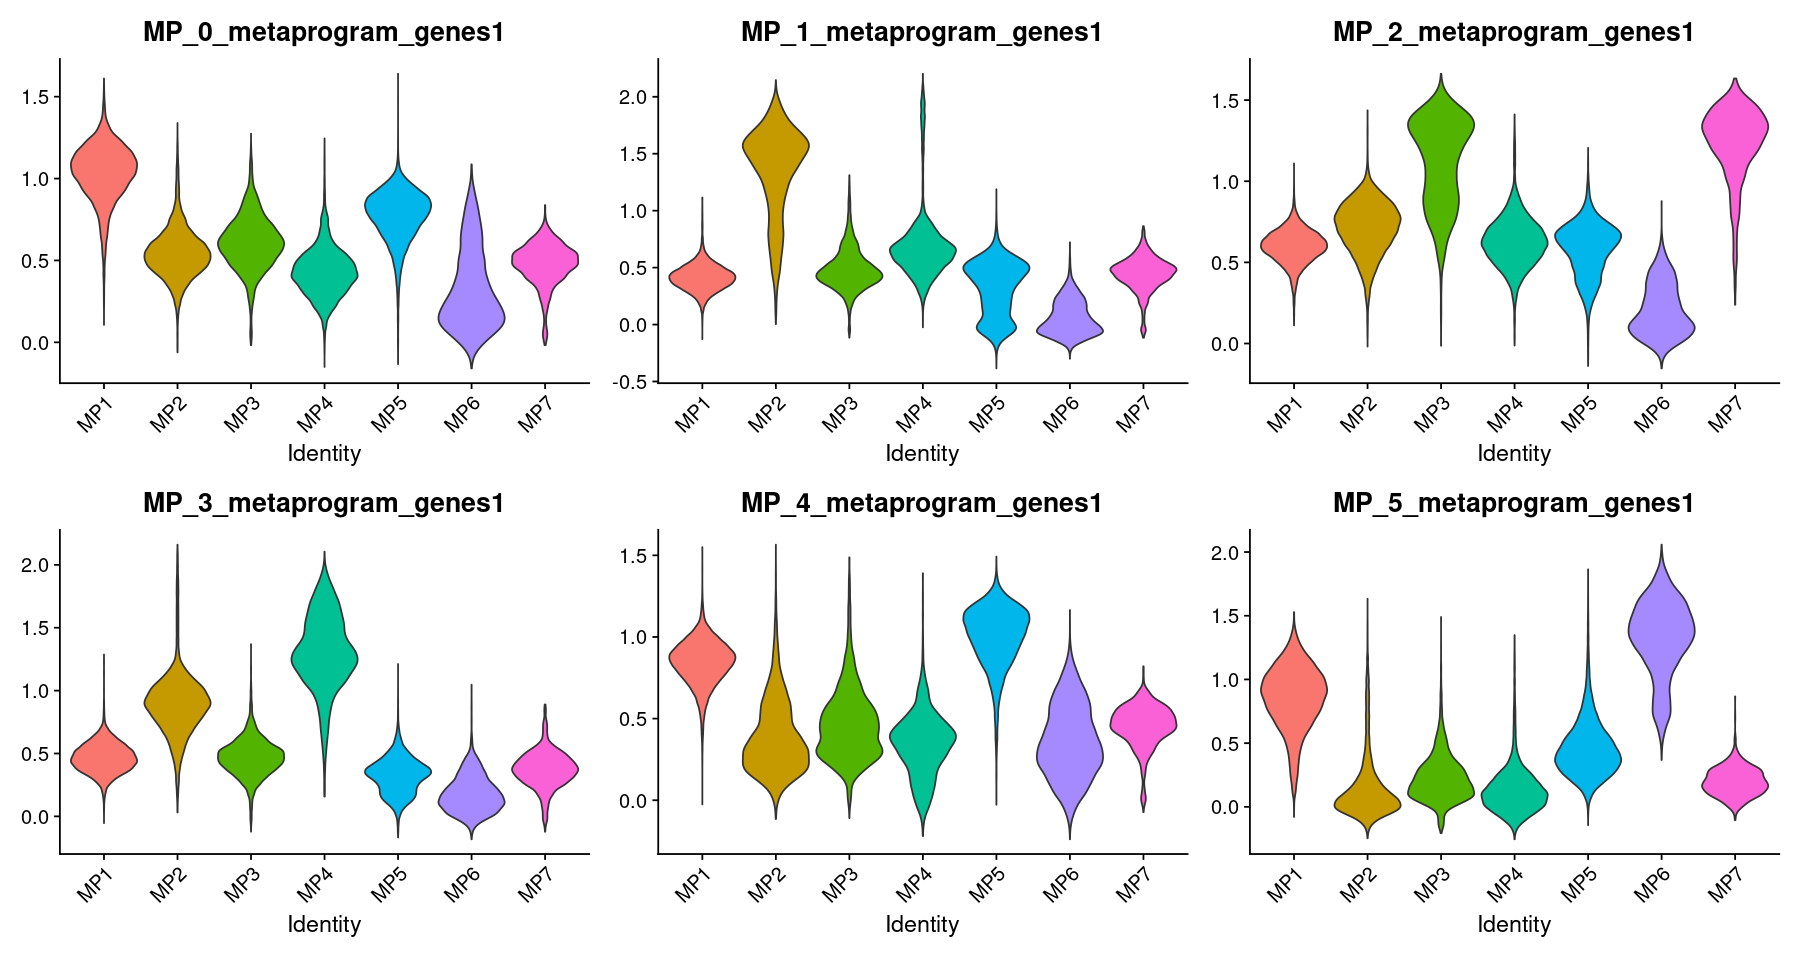

In [31]:
options(repr.plot.width=15, repr.plot.height=8)

VlnPlot(
  total_combined,
  c('MP_0_metaprogram_genes1', 'MP_1_metaprogram_genes1', 'MP_2_metaprogram_genes1',
   'MP_3_metaprogram_genes1', 'MP_4_metaprogram_genes1', 'MP_5_metaprogram_genes1'),
  group.by = "metaprogram", pt.size= 0
)

In [32]:
total_combined@meta.data

orig.ident    nCount_RNA nFeature_RNA
MP1_Sarcoma322GEX.3_CATCAGACAAGCTGAG.1 Sarcoma322GEX 36359      7463        
MP1_Sarcoma322GEX.3_AGCAGCCAGCACCGCT.1 Sarcoma322GEX 35518      7204        
MP1_Sarcoma322GEX.3_AAGCCGCTCGTTTATC.1 Sarcoma322GEX 34701      7150        
MP1_Sarcoma322GEX.3_CACCTTGAGGCGCTCT.1 Sarcoma322GEX 34358      7067        
MP1_Sarcoma322GEX.3_ATTATCCAGCTGCAAG.1 Sarcoma322GEX 34195      7459        
MP1_Sarcoma322GEX.3_GACGTTAGTTCCACAA.1 Sarcoma322GEX 34122      7363        
MP1_Sarcoma322GEX.3_CTTGGCTGTTAAGATG.1 Sarcoma322GEX 33816      7263        
MP1_Sarcoma322GEX.3_CGGACTGAGCGTAATA.1 Sarcoma322GEX 33486      7454        
MP1_Sarcoma322GEX.3_CTTCTCTTCTTTAGTC.1 Sarcoma322GEX 33378      7262        
MP1_Sarcoma322GEX.3_GCACATAGTACTCGCG.1 Sarcoma322GEX 32976      7199        
MP1_Sarcoma322GEX.3_CGCTATCAGAGTCTGG.1 Sarcoma322GEX 32893      7477        
MP1_Sarcoma322GEX.3_TCAGGTATCGGTTAAC.1 Sarcoma322GEX 32681      7285        
MP1_Sarcoma322GEX.3_ATCATCTGTTGGAGGT.1 Sarcoma322GEX 32462      7486        
MP1_Sarcoma322GEX.3_CGCTGGAGTCACCCAG.1 Sarcoma322GEX 32414      7264        
MP1_Sarcoma322GEX.3_GTAACGTCAAGAGGCT.1 Sarcoma322GEX 32041      7396        
MP1_Sarcoma322GEX.3_CGTAGGCTCTTACCGC.1 Sarcoma322GEX 32078      7375        
MP1_Sarcoma322GEX.3_AACCGCGTCCAACCAA.1 Sarcoma322GEX 32038      7456        
MP1_Sarcoma322GEX.3_CCTACACGTCACCTAA.1 Sarcoma322GEX 31949      7115        
MP1_Sarcoma322GEX.3_TTGCGTCCAGTGACAG.1 Sarcoma322GEX 31935      7284        
MP1_Sarcoma322GEX.3_AAGGTTCCACCAACCG.1 Sarcoma322GEX 31870      7257        
MP1_Sarcoma322GEX.3_CAGCAGCAGCGTCAAG.1 Sarcoma322GEX 31712      6970        
MP1_Sarcoma322GEX.3_AGGTCCGGTATGCTTG.1 Sarcoma322GEX 31499      7239        
MP1_Sarcoma322GEX.3_TGGGCGTCACATGGGA.1 Sarcoma322GEX 31459      7341        
MP1_Sarcoma322GEX.3_ACGATGTCACACGCTG.1 Sarcoma322GEX 31409      6799        
MP1_Sarcoma322GEX.3_ATCATCTAGGAGCGAG.1 Sarcoma322GEX 31379      7185        
MP1_Sarcoma322GEX.3_GGACGTCTCAACGGCC.1 Sarcoma322GEX 31428      7450        
MP1_Sarcoma322GEX.3_TACACGACAAGTTAAG.1 Sarcoma322GEX 31387      7438        
MP1_Sarcoma322GEX.3_GTCTCGTTCGGAAACG.1 Sarcoma322GEX 31201      7357        
MP1_Sarcoma322GEX.3_GCATGCGAGACTTGAA.1 Sarcoma322GEX 31198      7432        
MP1_Sarcoma322GEX.3_CTGCCTAGTATTAGCC.1 Sarcoma322GEX 31167      7066        
⋮                                      ⋮             ⋮          ⋮           
MP7_CCCAATCGTATCAGTC.1                 Sarcoma559GEX 756        403         
MP7_TGCGCAGAGCAGCGTA.1                 Sarcoma559GEX 660        417         
MP7_TCAGCTCGTGACCAAG.1                 Sarcoma559GEX 768        478         
MP7_CGCTTCACACGTTGGC.1                 Sarcoma559GEX 683        429         
MP7_ATCATGGCAAGCGATG.1                 Sarcoma559GEX 714        364         
MP7_CAGAGAGCATGAACCT.1                 Sarcoma559GEX 755        560         
MP7_CTAGAGTTCAGGTTCA.1                 Sarcoma559GEX 704        361         
MP7_GATGCTAAGCTATGCT.1                 Sarcoma559GEX 686        418         
MP7_TTTGCGCGTAGGCATG.1                 Sarcoma559GEX 677        403         
MP7_TTCGAAGCACATGGGA.1                 Sarcoma559GEX 702        470         
MP7_CATTCGCGTGACGGTA.1                 Sarcoma559GEX 663        479         
MP7_AGGGAGTGTTCAGCGC.1                 Sarcoma559GEX 711        535         
MP7_GTCTCGTGTACGACCC.1                 Sarcoma559GEX 681        469         
MP7_CATCAAGCATTGCGGC.1                 Sarcoma559GEX 690        492         
MP7_GGATGTTTCTATCCCG.1                 Sarcoma559GEX 653        377         
MP7_ACGGGCTAGTGTACGG.1                 Sarcoma559GEX 613        320         
MP7_ACGGCCAGTAGTGAAT.1                 Sarcoma559GEX 608        412         
MP7_TACTTACTCTCAACTT.1                 Sarcoma559GEX 628        383         
MP7_TCAGGTACAAATACAG.1                 Sarcoma559GEX 642        415         
MP7_ACGAGCCCAGTTAACC.1                 Sarcoma559GEX 653        452         
MP7_GATGAGGAGATGCGAC.1             

In [34]:
all_seurat_objs <- readRDS("../../../CompiledData/data/sarcoma_all/data_sarcoma_all_merged_obj.rds")
all_seurat_objs

An object of class Seurat 
37091 features across 75716 samples within 2 assays 
Active assay: integrated (2000 features, 2000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [61]:
current_rownames <- rownames(all_seurat_objs@meta.data)
new_rownames <- gsub("-", ".", current_rownames)
split_rownames <- sapply(new_rownames, function(x) unlist(strsplit(x, "_"))[1])
all_seurat_objs@meta.data$cellnames <- split_rownames

                         
total_combined@meta.data
split_rownames <- sapply(rownames(total_combined@meta.data), function(x)  tail(unlist(strsplit(x, "_")),n=1))
total_combined@meta.data$cellnames <- split_rownames


orig.ident    nCount_RNA nFeature_RNA
MP1_Sarcoma322GEX.3_CATCAGACAAGCTGAG.1 Sarcoma322GEX 36359      7463        
MP1_Sarcoma322GEX.3_AGCAGCCAGCACCGCT.1 Sarcoma322GEX 35518      7204        
MP1_Sarcoma322GEX.3_AAGCCGCTCGTTTATC.1 Sarcoma322GEX 34701      7150        
MP1_Sarcoma322GEX.3_CACCTTGAGGCGCTCT.1 Sarcoma322GEX 34358      7067        
MP1_Sarcoma322GEX.3_ATTATCCAGCTGCAAG.1 Sarcoma322GEX 34195      7459        
MP1_Sarcoma322GEX.3_GACGTTAGTTCCACAA.1 Sarcoma322GEX 34122      7363        
MP1_Sarcoma322GEX.3_CTTGGCTGTTAAGATG.1 Sarcoma322GEX 33816      7263        
MP1_Sarcoma322GEX.3_CGGACTGAGCGTAATA.1 Sarcoma322GEX 33486      7454        
MP1_Sarcoma322GEX.3_CTTCTCTTCTTTAGTC.1 Sarcoma322GEX 33378      7262        
MP1_Sarcoma322GEX.3_GCACATAGTACTCGCG.1 Sarcoma322GEX 32976      7199        
MP1_Sarcoma322GEX.3_CGCTATCAGAGTCTGG.1 Sarcoma322GEX 32893      7477        
MP1_Sarcoma322GEX.3_TCAGGTATCGGTTAAC.1 Sarcoma322GEX 32681      7285        
MP1_Sarcoma322GEX.3_ATCATCTGTTGGAGGT.1 Sarcoma322GEX 32462      7486        
MP1_Sarcoma322GEX.3_CGCTGGAGTCACCCAG.1 Sarcoma322GEX 32414      7264        
MP1_Sarcoma322GEX.3_GTAACGTCAAGAGGCT.1 Sarcoma322GEX 32041      7396        
MP1_Sarcoma322GEX.3_CGTAGGCTCTTACCGC.1 Sarcoma322GEX 32078      7375        
MP1_Sarcoma322GEX.3_AACCGCGTCCAACCAA.1 Sarcoma322GEX 32038      7456        
MP1_Sarcoma322GEX.3_CCTACACGTCACCTAA.1 Sarcoma322GEX 31949      7115        
MP1_Sarcoma322GEX.3_TTGCGTCCAGTGACAG.1 Sarcoma322GEX 31935      7284        
MP1_Sarcoma322GEX.3_AAGGTTCCACCAACCG.1 Sarcoma322GEX 31870      7257        
MP1_Sarcoma322GEX.3_CAGCAGCAGCGTCAAG.1 Sarcoma322GEX 31712      6970        
MP1_Sarcoma322GEX.3_AGGTCCGGTATGCTTG.1 Sarcoma322GEX 31499      7239        
MP1_Sarcoma322GEX.3_TGGGCGTCACATGGGA.1 Sarcoma322GEX 31459      7341        
MP1_Sarcoma322GEX.3_ACGATGTCACACGCTG.1 Sarcoma322GEX 31409      6799        
MP1_Sarcoma322GEX.3_ATCATCTAGGAGCGAG.1 Sarcoma322GEX 31379      7185        
MP1_Sarcoma322GEX.3_GGACGTCTCAACGGCC.1 Sarcoma322GEX 31428      7450        
MP1_Sarcoma322GEX.3_TACACGACAAGTTAAG.1 Sarcoma322GEX 31387      7438        
MP1_Sarcoma322GEX.3_GTCTCGTTCGGAAACG.1 Sarcoma322GEX 31201      7357        
MP1_Sarcoma322GEX.3_GCATGCGAGACTTGAA.1 Sarcoma322GEX 31198      7432        
MP1_Sarcoma322GEX.3_CTGCCTAGTATTAGCC.1 Sarcoma322GEX 31167      7066        
⋮                                      ⋮             ⋮          ⋮           
MP7_CCCAATCGTATCAGTC.1                 Sarcoma559GEX 756        403         
MP7_TGCGCAGAGCAGCGTA.1                 Sarcoma559GEX 660        417         
MP7_TCAGCTCGTGACCAAG.1                 Sarcoma559GEX 768        478         
MP7_CGCTTCACACGTTGGC.1                 Sarcoma559GEX 683        429         
MP7_ATCATGGCAAGCGATG.1                 Sarcoma559GEX 714        364         
MP7_CAGAGAGCATGAACCT.1                 Sarcoma559GEX 755        560         
MP7_CTAGAGTTCAGGTTCA.1                 Sarcoma559GEX 704        361         
MP7_GATGCTAAGCTATGCT.1                 Sarcoma559GEX 686        418         
MP7_TTTGCGCGTAGGCATG.1                 Sarcoma559GEX 677        403         
MP7_TTCGAAGCACATGGGA.1                 Sarcoma559GEX 702        470         
MP7_CATTCGCGTGACGGTA.1                 Sarcoma559GEX 663        479         
MP7_AGGGAGTGTTCAGCGC.1                 Sarcoma559GEX 711        535         
MP7_GTCTCGTGTACGACCC.1                 Sarcoma559GEX 681        469         
MP7_CATCAAGCATTGCGGC.1                 Sarcoma559GEX 690        492         
MP7_GGATGTTTCTATCCCG.1                 Sarcoma559GEX 653        377         
MP7_ACGGGCTAGTGTACGG.1                 Sarcoma559GEX 613        320         
MP7_ACGGCCAGTAGTGAAT.1                 Sarcoma559GEX 608        412         
MP7_TACTTACTCTCAACTT.1                 Sarcoma559GEX 628        383         
MP7_TCAGGTACAAATACAG.1                 Sarcoma559GEX 642        415         
MP7_ACGAGCCCAGTTAACC.1                 Sarcoma559GEX 653        452         
MP7_GATGAGGAGATGCGAC.1             

In [57]:
all_seurat_objs@meta.data

orig.ident     nCount_RNA nFeature_RNA percent.mt
GATTCAGAGCCGATTT-1_1 Sarcoma167GEX  39853      7432         0.63483301
ATCGAGTGTGCTTCTC-1_1 Sarcoma167GEX  39700      6956         2.20403023
CTAGAGTGTTCCCGAG-1_1 Sarcoma167GEX  39610      7439         1.52486746
TCTGAGACAATCCAAC-1_1 Sarcoma167GEX  39277      7151         0.04582835
GCATGATAGTGACTCT-1_1 Sarcoma167GEX  39329      7417         0.74245468
GAACCTAGTTTCCACC-1_1 Sarcoma167GEX  38867      7379         2.45195153
CATCAGAAGCTTTGGT-1_1 Sarcoma167GEX  38875      7188         1.56913183
GTTCGGGCACAGACAG-1_1 Sarcoma167GEX  38621      7399         0.44535356
CATGCCTTCCAAATGC-1_1 Sarcoma167GEX  38183      7046         1.91970249
GACAGAGTCGGATGTT-1_1 Sarcoma167GEX  38004      6891         1.75244711
GCTGCAGAGGGATACC-1_1 Sarcoma167GEX  38017      6679         2.14903859
GGAACTTCACATGTGT-1_1 Sarcoma167GEX  37787      7188         1.06915077
GTCATTTGTCATACTG-1_1 Sarcoma167GEX  37729      7258         1.09464868
CACAGTATCTTTAGGG-1_1 Sarcoma167GEX  37727      7273         0.02650622
GTTAAGCAGCAACGGT-1_1 Sarcoma167GEX  37419      6875         0.95406077
GTTACAGTCGGTCCGA-1_1 Sarcoma167GEX  37314      7441         0.20099694
CTCCTAGCAGTCCTTC-1_1 Sarcoma167GEX  37408      6855         2.58768178
TCGAGGCAGACTAAGT-1_1 Sarcoma167GEX  37395      6840         2.66078353
CAACCTCCACAGACAG-1_1 Sarcoma167GEX  36915      6979         0.65556007
ATCTACTAGAGTAAGG-1_1 Sarcoma167GEX  36864      7336         0.18717448
TTTGTCATCGTTACAG-1_1 Sarcoma167GEX  36794      7431         0.80719683
TCGAGGCTCACTTACT-1_1 Sarcoma167GEX  36745      7007         1.11035515
CATTCGCAGCGTTTAC-1_1 Sarcoma167GEX  36109      7156         1.78071949
CACTCCAAGCAATATG-1_1 Sarcoma167GEX  35662      7376         1.10481745
GAAGCAGCACAGCGTC-1_1 Sarcoma167GEX  35665      7357         1.75522221
ATCATCTCAGCCAATT-1_1 Sarcoma167GEX  35550      7240         0.30098453
TTGCGTCTCGCGGATC-1_1 Sarcoma167GEX  35203      7031         1.76689487
TTGTAGGCAATGAATG-1_1 Sarcoma167GEX  35144      7253         1.86660596
GATGAGGAGAAGATTC-1_1 Sarcoma167GEX  35147      7434         2.88502575
TTGCCGTCAAATACAG-1_1 Sarcoma167GEX  35051      7098         0.99854498
⋮                    ⋮              ⋮          ⋮            ⋮         
GGTATTGAGCAGCGTA-1_8 SarcomaS956GEX 708        488          9.8870056 
CGGACACCACCAGATT-1_8 SarcomaS956GEX 710        557          1.9718310 
TGCACCTTCGTCTGAA-1_8 SarcomaS956GEX 603        560          1.4925373 
AGATCTGTCCCATTTA-1_8 SarcomaS956GEX 757        554          4.0951123 
TCTTTCCGTCCGAGTC-1_8 SarcomaS956GEX 652        464          8.5889571 
CGTTGGGCAGACGTAG-1_8 SarcomaS956GEX 659        461          7.2837633 
TACACGATCGACAGCC-1_8 SarcomaS956GEX 657        506          6.0882801 
TGGACGCAGATATGCA-1_8 SarcomaS956GEX 684        490          0.0000000 
GCAGTTAGTGCTAGCC-1_8 SarcomaS956GEX 648        454          0.6172840 
ATTATCCTCACGCGGT-1_8 SarcomaS956GEX 659        428          0.1517451 
CATGACAAGCCACGTC-1_8 SarcomaS956GEX 653        433          5.2067381 
AGCGGTCGTGGAAAGA-1_8 SarcomaS956GEX 665        457          8.8721805 
GTGTTAGCAGATTGCT-1_8 SarcomaS956GEX 634        465          6.7823344 
CAGCCGACACACAGAG-1_8 SarcomaS956GEX 605        408          9.4214876 
TTTACTGCATGCTAGT-1_8 SarcomaS956GEX 652        451          9.8159509 
AGTCTTTGTATAGGTA-1_8 SarcomaS956GEX 641        434          8.4243370 
TTCTTAGAGTACCGGA-1_8 SarcomaS956GEX 630        440          8.7301587 
CTACCCAAGATGCCAG-1_8 SarcomaS956GEX 647        447          8.0370943 
CTCTGGTAGACGACGT-1_8 SarcomaS956GEX 658        451          6.0790274 
CGCTTCACATGCGCAC-1_8 SarcomaS956GEX 675        413          1.0370370 
CATGCCTCAGCGAACA-1_8 SarcomaS956GEX 638        433          9.5611285 
TGGTTCCCAGTAAGAT-1_8 SarcomaS956GEX 680        491          5.1470588 
GGCCGATTCAAGGTAA-1_8 SarcomaS956GEX 711        550          1.1251758 
ACCTTTAAGCCGTCGT-1_8 SarcomaS956GEX 618        459          0.3236246 
CTCTGGTGTACAGTGG-1_8 SarcomaS956GEX 635      

In [69]:
unique(total_combined@meta.data['cellnames']
)

cellnames         
MP1_Sarcoma322GEX.3_CATCAGACAAGCTGAG.1  CATCAGACAAGCTGAG.1
MP1_Sarcoma322GEX.3_AGCAGCCAGCACCGCT.1  AGCAGCCAGCACCGCT.1
MP1_Sarcoma322GEX.3_AAGCCGCTCGTTTATC.1  AAGCCGCTCGTTTATC.1
MP1_Sarcoma322GEX.3_CACCTTGAGGCGCTCT.1  CACCTTGAGGCGCTCT.1
MP1_Sarcoma322GEX.3_ATTATCCAGCTGCAAG.1  ATTATCCAGCTGCAAG.1
MP1_Sarcoma322GEX.3_GACGTTAGTTCCACAA.1  GACGTTAGTTCCACAA.1
MP1_Sarcoma322GEX.3_CTTGGCTGTTAAGATG.1  CTTGGCTGTTAAGATG.1
MP1_Sarcoma322GEX.3_CGGACTGAGCGTAATA.1  CGGACTGAGCGTAATA.1
MP1_Sarcoma322GEX.3_CTTCTCTTCTTTAGTC.1  CTTCTCTTCTTTAGTC.1
MP1_Sarcoma322GEX.3_GCACATAGTACTCGCG.1  GCACATAGTACTCGCG.1
MP1_Sarcoma322GEX.3_CGCTATCAGAGTCTGG.1  CGCTATCAGAGTCTGG.1
MP1_Sarcoma322GEX.3_TCAGGTATCGGTTAAC.1  TCAGGTATCGGTTAAC.1
MP1_Sarcoma322GEX.3_ATCATCTGTTGGAGGT.1  ATCATCTGTTGGAGGT.1
MP1_Sarcoma322GEX.3_CGCTGGAGTCACCCAG.1  CGCTGGAGTCACCCAG.1
MP1_Sarcoma322GEX.3_GTAACGTCAAGAGGCT.1  GTAACGTCAAGAGGCT.1
MP1_Sarcoma322GEX.3_CGTAGGCTCTTACCGC.1  CGTAGGCTCTTACCGC.1
MP1_Sarcoma322GEX.3_AACCGCGTCCAACCAA.1  AACCGCGTCCAACCAA.1
MP1_Sarcoma322GEX.3_CCTACACGTCACCTAA.1  CCTACACGTCACCTAA.1
MP1_Sarcoma322GEX.3_TTGCGTCCAGTGACAG.1  TTGCGTCCAGTGACAG.1
MP1_Sarcoma322GEX.3_AAGGTTCCACCAACCG.1  AAGGTTCCACCAACCG.1
MP1_Sarcoma322GEX.3_CAGCAGCAGCGTCAAG.1  CAGCAGCAGCGTCAAG.1
MP1_Sarcoma322GEX.3_AGGTCCGGTATGCTTG.1  AGGTCCGGTATGCTTG.1
MP1_Sarcoma322GEX.3_TGGGCGTCACATGGGA.1  TGGGCGTCACATGGGA.1
MP1_Sarcoma322GEX.3_ACGATGTCACACGCTG.1  ACGATGTCACACGCTG.1
MP1_Sarcoma322GEX.3_ATCATCTAGGAGCGAG.1  ATCATCTAGGAGCGAG.1
MP1_Sarcoma322GEX.3_GGACGTCTCAACGGCC.1  GGACGTCTCAACGGCC.1
MP1_Sarcoma322GEX.3_TACACGACAAGTTAAG.1  TACACGACAAGTTAAG.1
MP1_Sarcoma322GEX.3_GTCTCGTTCGGAAACG.1  GTCTCGTTCGGAAACG.1
MP1_Sarcoma322GEX.3_GCATGCGAGACTTGAA.1  GCATGCGAGACTTGAA.1
MP1_Sarcoma322GEX.3_CTGCCTAGTATTAGCC.1  CTGCCTAGTATTAGCC.1
⋮                                       ⋮                 
MP6_SarcomaS956GEX.3_GTCAAGTCAGCCAGAA.1 GTCAAGTCAGCCAGAA.1
MP6_SarcomaS956GEX.3_GCAAACTAGACCGGAT.1 GCAAACTAGACCGGAT.1
MP6_SarcomaS956GEX.3_CCAGCGATCTCCGGTT.1 CCAGCGATCTCCGGTT.1
MP6_SarcomaS956GEX.3_TGACTAGTCCCTGACT.1 TGACTAGTCCCTGACT.1
MP6_SarcomaS956GEX.3_GGCGTGTCATCTATGG.1 GGCGTGTCATCTATGG.1
MP6_SarcomaS956GEX.3_TCAACGAGTGCTCTTC.1 TCAACGAGTGCTCTTC.1
MP6_SarcomaS956GEX.3_ACGGCCACAGCTTCGG.1 ACGGCCACAGCTTCGG.1
MP6_SarcomaS956GEX.3_GTGCTTCCATGAGCGA.1 GTGCTTCCATGAGCGA.1
MP6_SarcomaS956GEX.3_TGTTCCGAGACGCAAC.1 TGTTCCGAGACGCAAC.1
MP6_SarcomaS956GEX.3_GATCGTATCTGCGGCA.1 GATCGTATCTGCGGCA.1
MP6_SarcomaS956GEX.3_TCATTACGTGAAGGCT.1 TCATTACGTGAAGGCT.1
MP6_SarcomaS956GEX.3_AGGCCGTCAAAGTGCG.1 AGGCCGTCAAAGTGCG.1
MP6_SarcomaS956GEX.3_CACCACTTCTGATACG.1 CACCACTTCTGATACG.1
MP6_SarcomaS956GEX.3_GTATTCTTCTGCGACG.1 GTATTCTTCTGCGACG.1
MP6_SarcomaS956GEX.3_CCTACCAGTCAGCTAT.1 CCTACCAGTCAGCTAT.1
MP6_SarcomaS956GEX.3_AGCCTAAAGCAGGCTA.1 AGCCTAAAGCAGGCTA.1
MP6_SarcomaS956GEX.3_TCGCGAGAGGTCATCT.1 TCGCGAGAGGTCATCT.1
MP6_SarcomaS956GEX.3_GCGGGTTGTCGTCTTC.1 GCGGGTTGTCGTCTTC.1
MP6_SarcomaS956GEX.3_TCTTCGGTCTGGCGAC.1 TCTTCGGTCTGGCGAC.1
MP6_SarcomaS956GEX.3_ACTGTCCAGTACGCGA.1 ACTGTCCAGTACGCGA.1
MP6_SarcomaS956GEX.3_TAGTTGGAGTCTTGCA.1 TAGTTGGAGTCTTGCA.1
MP6_SarcomaS956GEX.3_CGACCTTGTTAAGACA.1 CGACCTTGTTAAGACA.1
MP6_SarcomaS956GEX.3_CGTCAGGAGCACACAG.1 CGTCAGGAGCACACAG.1
MP6_SarcomaS956GEX.3_GACTACATCCTCCTAG.1 GACTACATCCTCCTAG.1
MP6_SarcomaS956GEX.3_CCTAGCTGTGCAGACA.1 CCTAGCTGTGCAGACA.1
MP6_SarcomaS956GEX.3_GGTATTGAGCAGCGTA.1 GGTATTGAGCAGCGTA.1
MP6_SarcomaS956GEX.3_CGGACACCACCAGATT.1 CGGACACCACCAGATT.1
MP6_SarcomaS956GEX.3_TCTTTCCGTCCGAGTC.1 TCTTTCCGTCCGAGTC.1
MP6_SarcomaS956GEX.3_CATGACAAGCCACGTC.1 CATGACAAGCCACGTC.1
MP6_SarcomaS956GEX.3_CTCTGGTAGACGACGT.1 CTCTGGTAGACGACGT.1

In [65]:
matched_rows <- match(paste(all_seurat_objs@meta.data$cellnames, all_seurat_objs@meta.data$orig.ident, sep="_"),
                      paste(total_combined@meta.data$cellnames, total_combined@meta.data$orig.ident, sep="_")
                      )

all_seurat_objs@meta.data$metaprogram <- total_combined@meta.data$metaprogram[matched_rows]


In [66]:
all_seurat_objs@meta.data

orig.ident     nCount_RNA nFeature_RNA percent.mt
GATTCAGAGCCGATTT-1_1 Sarcoma167GEX  39853      7432         0.63483301
ATCGAGTGTGCTTCTC-1_1 Sarcoma167GEX  39700      6956         2.20403023
CTAGAGTGTTCCCGAG-1_1 Sarcoma167GEX  39610      7439         1.52486746
TCTGAGACAATCCAAC-1_1 Sarcoma167GEX  39277      7151         0.04582835
GCATGATAGTGACTCT-1_1 Sarcoma167GEX  39329      7417         0.74245468
GAACCTAGTTTCCACC-1_1 Sarcoma167GEX  38867      7379         2.45195153
CATCAGAAGCTTTGGT-1_1 Sarcoma167GEX  38875      7188         1.56913183
GTTCGGGCACAGACAG-1_1 Sarcoma167GEX  38621      7399         0.44535356
CATGCCTTCCAAATGC-1_1 Sarcoma167GEX  38183      7046         1.91970249
GACAGAGTCGGATGTT-1_1 Sarcoma167GEX  38004      6891         1.75244711
GCTGCAGAGGGATACC-1_1 Sarcoma167GEX  38017      6679         2.14903859
GGAACTTCACATGTGT-1_1 Sarcoma167GEX  37787      7188         1.06915077
GTCATTTGTCATACTG-1_1 Sarcoma167GEX  37729      7258         1.09464868
CACAGTATCTTTAGGG-1_1 Sarcoma167GEX  37727      7273         0.02650622
GTTAAGCAGCAACGGT-1_1 Sarcoma167GEX  37419      6875         0.95406077
GTTACAGTCGGTCCGA-1_1 Sarcoma167GEX  37314      7441         0.20099694
CTCCTAGCAGTCCTTC-1_1 Sarcoma167GEX  37408      6855         2.58768178
TCGAGGCAGACTAAGT-1_1 Sarcoma167GEX  37395      6840         2.66078353
CAACCTCCACAGACAG-1_1 Sarcoma167GEX  36915      6979         0.65556007
ATCTACTAGAGTAAGG-1_1 Sarcoma167GEX  36864      7336         0.18717448
TTTGTCATCGTTACAG-1_1 Sarcoma167GEX  36794      7431         0.80719683
TCGAGGCTCACTTACT-1_1 Sarcoma167GEX  36745      7007         1.11035515
CATTCGCAGCGTTTAC-1_1 Sarcoma167GEX  36109      7156         1.78071949
CACTCCAAGCAATATG-1_1 Sarcoma167GEX  35662      7376         1.10481745
GAAGCAGCACAGCGTC-1_1 Sarcoma167GEX  35665      7357         1.75522221
ATCATCTCAGCCAATT-1_1 Sarcoma167GEX  35550      7240         0.30098453
TTGCGTCTCGCGGATC-1_1 Sarcoma167GEX  35203      7031         1.76689487
TTGTAGGCAATGAATG-1_1 Sarcoma167GEX  35144      7253         1.86660596
GATGAGGAGAAGATTC-1_1 Sarcoma167GEX  35147      7434         2.88502575
TTGCCGTCAAATACAG-1_1 Sarcoma167GEX  35051      7098         0.99854498
⋮                    ⋮              ⋮          ⋮            ⋮         
GGTATTGAGCAGCGTA-1_8 SarcomaS956GEX 708        488          9.8870056 
CGGACACCACCAGATT-1_8 SarcomaS956GEX 710        557          1.9718310 
TGCACCTTCGTCTGAA-1_8 SarcomaS956GEX 603        560          1.4925373 
AGATCTGTCCCATTTA-1_8 SarcomaS956GEX 757        554          4.0951123 
TCTTTCCGTCCGAGTC-1_8 SarcomaS956GEX 652        464          8.5889571 
CGTTGGGCAGACGTAG-1_8 SarcomaS956GEX 659        461          7.2837633 
TACACGATCGACAGCC-1_8 SarcomaS956GEX 657        506          6.0882801 
TGGACGCAGATATGCA-1_8 SarcomaS956GEX 684        490          0.0000000 
GCAGTTAGTGCTAGCC-1_8 SarcomaS956GEX 648        454          0.6172840 
ATTATCCTCACGCGGT-1_8 SarcomaS956GEX 659        428          0.1517451 
CATGACAAGCCACGTC-1_8 SarcomaS956GEX 653        433          5.2067381 
AGCGGTCGTGGAAAGA-1_8 SarcomaS956GEX 665        457          8.8721805 
GTGTTAGCAGATTGCT-1_8 SarcomaS956GEX 634        465          6.7823344 
CAGCCGACACACAGAG-1_8 SarcomaS956GEX 605        408          9.4214876 
TTTACTGCATGCTAGT-1_8 SarcomaS956GEX 652        451          9.8159509 
AGTCTTTGTATAGGTA-1_8 SarcomaS956GEX 641        434          8.4243370 
TTCTTAGAGTACCGGA-1_8 SarcomaS956GEX 630        440          8.7301587 
CTACCCAAGATGCCAG-1_8 SarcomaS956GEX 647        447          8.0370943 
CTCTGGTAGACGACGT-1_8 SarcomaS956GEX 658        451          6.0790274 
CGCTTCACATGCGCAC-1_8 SarcomaS956GEX 675        413          1.0370370 
CATGCCTCAGCGAACA-1_8 SarcomaS956GEX 638        433          9.5611285 
TGGTTCCCAGTAAGAT-1_8 SarcomaS956GEX 680        491          5.1470588 
GGCCGATTCAAGGTAA-1_8 SarcomaS956GEX 711        550          1.1251758 
ACCTTTAAGCCGTCGT-1_8 SarcomaS956GEX 618        459          0.3236246 
CTCTGGTGTACAGTGG-1_8 SarcomaS956GEX 635      